<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lesson 11 - Clustering with Sklearn

---

In this notebook we'll practice clustering algorithms with Scikit-Learn.

## Data sets

We'll use the following datasets:
* Some sample data
* [Iris](http://archive.ics.uci.edu/ml/datasets/Iris)
* [Old Faithful eruption data](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat): eruption times and wait times between eruptions of a geyser in the Yellowstone National Park

There are many [clustering data sets](https://archive.ics.uci.edu/ml/datasets.html?format=&task=clu&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) you can use for practice!


In [89]:
%matplotlib inline
from collections import Counter #counts values e.g. 1,1,1,2,2,2 becomes {1:3,2:3}
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
# increase seaborn fonts
sns.set(font_scale=1.5)

from sklearn import metrics

from sklearn.cluster import KMeans, DBSCAN

## Create some synthetic data

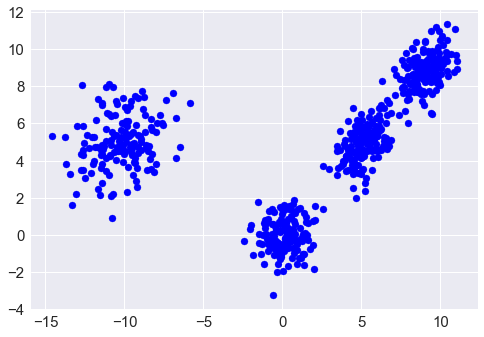

In [3]:
from scipy.stats import multivariate_normal # produces random data points for 2 or more variables

data = []

def create_data(data,num=150,mean=[0,0],cov=[[1,0],[0,1]]):
    dist = multivariate_normal(mean=mean, cov=cov) #in this case, we have 2 variables so we provide 2 means, 2 cov
    for i in range(num):
        data.append(dist.rvs())
    return data
        
data = []
data = create_data(data)
data = create_data(data,mean=[5,5], cov=[[1,0.5],[0.5,1]])
data = create_data(data,mean=[9,9], cov=[[1,0.2],[0.2,1]])
data = create_data(data,mean=[-10,5], cov=[[3,0.5],[0.5,2]])

df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'],c='b')
plt.show()

In [4]:
def annulus(inner_radius, outer_radius, n=30, color='b'):
    """Generate n points with class `colour` between the inner radius and the outer radius."""
    data = []
    diff = outer_radius - inner_radius
    for _ in range(n):
        # Pick an angle and radius
        angle = 2 * np.pi * random.random()
        r = inner_radius + diff * random.random()
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        data.append((x, y))
    # Return a data frame for convenience
    xs, ys = zip(*data)
    df = pd.DataFrame()
    df["x"] = xs
    df["y"] = ys
    df["color"] = color
    return df

df1 = annulus(2, 6, 200, color='r')
df2 = annulus(8, 10, 300, color='b')
df_circ = pd.concat([df1, df2])

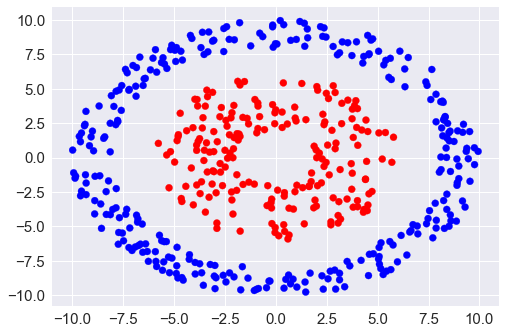

In [5]:
plt.scatter(df_circ['x'], df_circ['y'], c=df_circ['color'])
plt.show()

## K-Means with sklearn

In [31]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

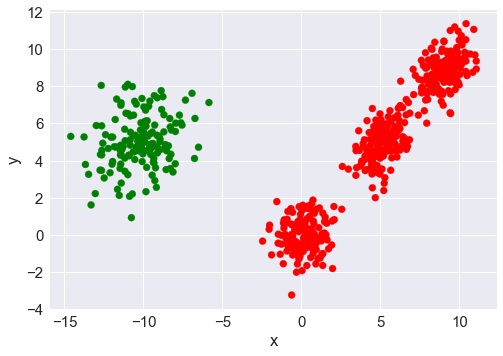

In [32]:
# Plot the data

def set_colors(labels, colors='rgbykcm'*10):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's try it with `k=4` this time.

Counter({2: 151, 3: 150, 0: 150, 1: 149})


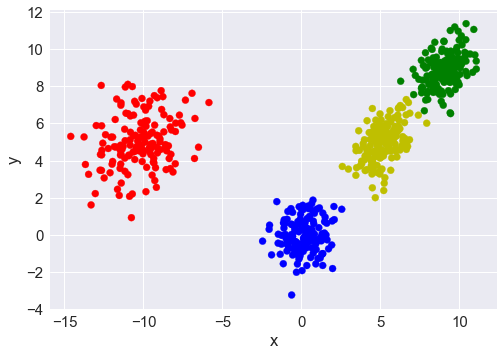

In [33]:
estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's try the circular data.

Counter({1: 261, 0: 239})


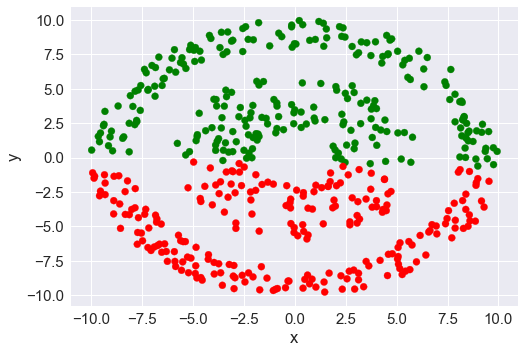

In [48]:
estimator = KMeans(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Not so great on this dataset. Now let's try some real data.

In [43]:
of_df = pd.read_csv("old-faithful.csv")
of_df.head()

,eruption_time,wait_time
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


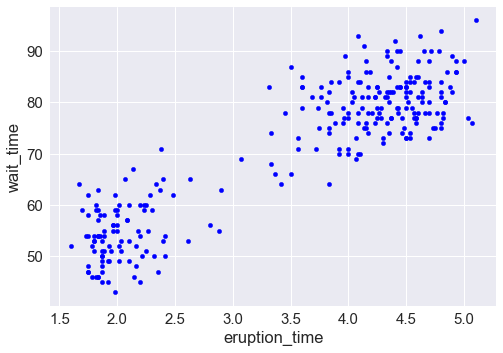

In [44]:
of_df.plot.scatter(x="eruption_time", y="wait_time",c='b')
plt.show()

Counter({1: 172, 0: 100})


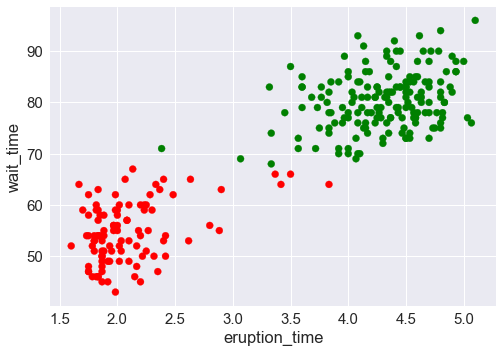

In [50]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = of_df[["eruption_time", "wait_time"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

# Plot the data

colors = set_colors(labels)
plt.scatter(of_df["eruption_time"], of_df["wait_time"], c=colors)
plt.xlabel("eruption_time")
plt.ylabel("wait_time")
plt.show()

## Exercise: k-means

For the Iris dataset, fit and plot k-means models to:
* sepal_length and petal_length, for k=2 and k=3
* sepal_width and petal_width, for k=2 and k=3

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

After: Check out the 3D-example [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

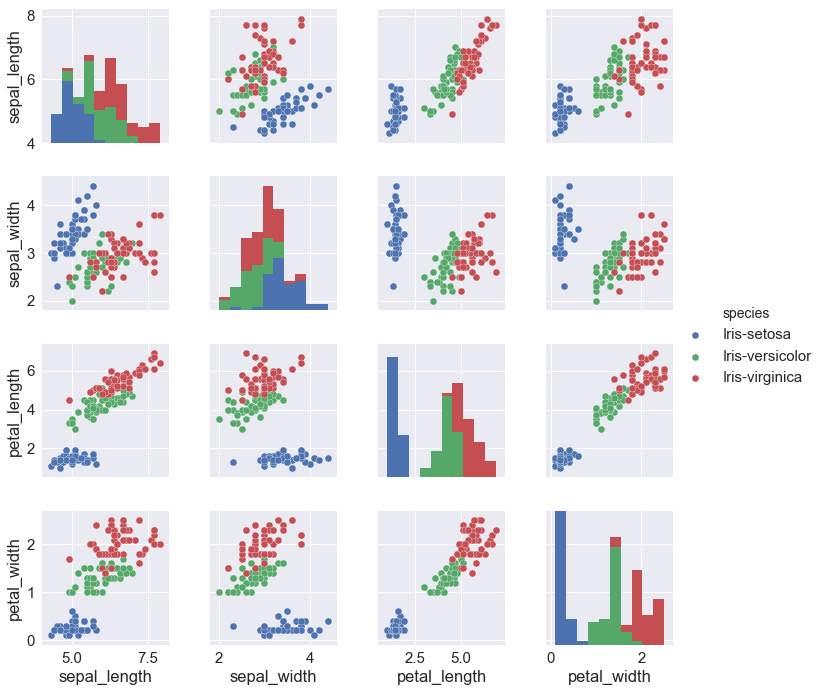

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [51]:
iris = pd.read_csv("iris.data")

sns.pairplot(iris, hue="species")
plt.show()

iris.tail()

Counter({0: 96, 1: 54})


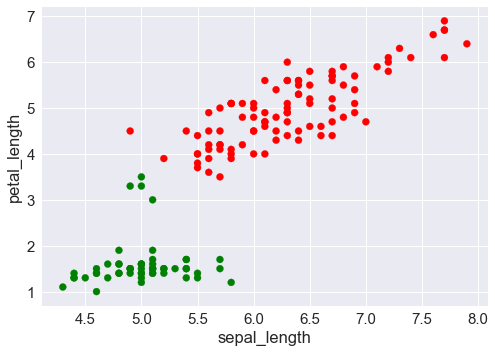

0.53122904739800914

In [91]:
estimator = KMeans(n_clusters=2)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)

labels = estimator.labels_
print (Counter(labels))

# Plot the data

colors = set_colors(labels)
plt.scatter(iris["sepal_length"], iris["petal_length"], c=colors)
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()

metrics.adjusted_rand_score(np.array(iris.species), labels) 

Counter({2: 58, 1: 51, 0: 41})


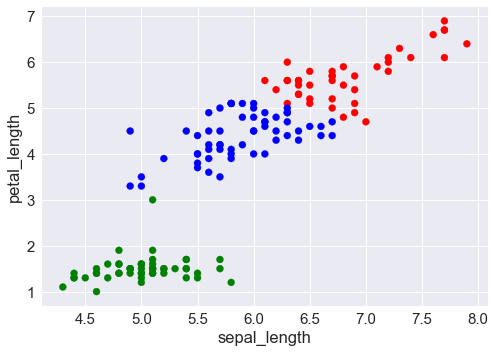

0.69886276723480922

In [92]:
estimator = KMeans(n_clusters=3)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)

labels = estimator.labels_
print (Counter(labels))

# Plot the data

colors = set_colors(labels)
plt.scatter(iris["sepal_length"], iris["petal_length"], c=colors)
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()

metrics.adjusted_rand_score(np.array(iris.species), labels) 

Counter({1: 100, 0: 50})


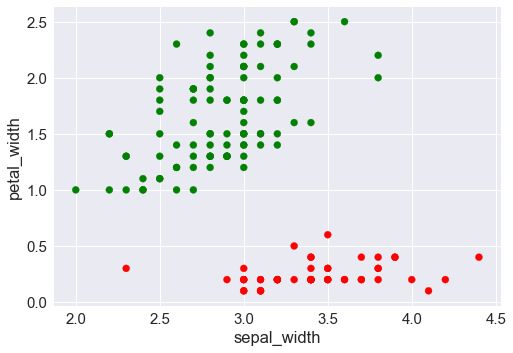

0.56811594202898552

In [93]:
estimator = KMeans(n_clusters=2)
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)

labels = estimator.labels_
print (Counter(labels))

# Plot the data

colors = set_colors(labels)
plt.scatter(iris["sepal_width"], iris["petal_width"], c=colors)
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.show()

metrics.adjusted_rand_score(np.array(iris.species), labels) 

Counter({2: 53, 1: 49, 0: 48})


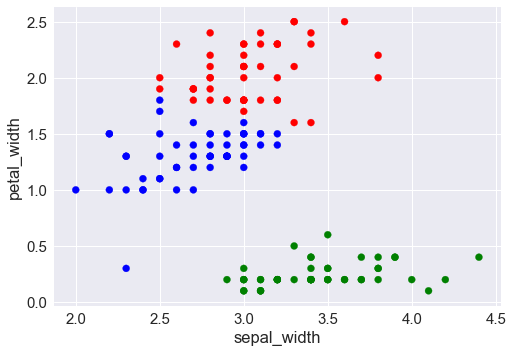

0.79717470561917547

In [94]:
estimator = KMeans(n_clusters=3)
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)

labels = estimator.labels_
print (Counter(labels))

# Plot the data

colors = set_colors(labels)
plt.scatter(iris["sepal_width"], iris["petal_width"], c=colors)
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.show()

metrics.adjusted_rand_score(np.array(iris.species), labels) 

Counter({2: 52, 0: 50, 1: 48})


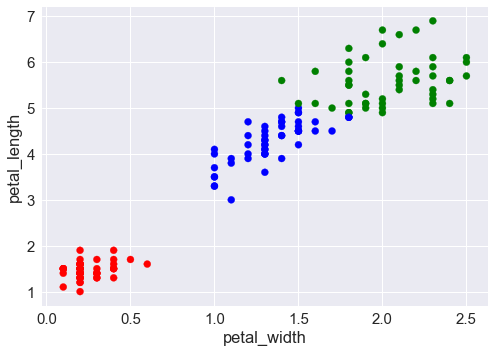

0.88569703102812281

In [95]:
estimator = KMeans(n_clusters=3)
X = iris[["petal_width", "petal_length"]]
estimator.fit(X)

labels = estimator.labels_
print (Counter(labels))

# Plot the data

colors = set_colors(labels)
plt.scatter(iris["petal_width"], iris["petal_length"], c=colors)
plt.xlabel("petal_width")
plt.ylabel("petal_length")
plt.show()

metrics.adjusted_rand_score(np.array(iris.true_value), labels)  

In [97]:
estimator = KMeans(n_clusters=3)
X = iris[["petal_width", "petal_length", "sepal_width"]]
estimator.fit(X)

labels = estimator.labels_
print (Counter(labels))

metrics.adjusted_rand_score(np.array(iris.true_value), labels)  

Counter({2: 53, 1: 50, 0: 47})


0.86811093480397961

In [99]:
estimator = KMeans(n_clusters=3)
X = iris[["petal_width", "petal_length", "sepal_width", "sepal_length"]]
estimator.fit(X)

labels = estimator.labels_
print (Counter(labels))

metrics.adjusted_rand_score(np.array(iris.true_value), labels)  

# the adjusted Rand index is a function that measures the similarity of the two assignments

Counter({1: 62, 0: 50, 2: 38})


0.73023827228346971

## DBSCAN

Counter({1: 147, 2: 147, 0: 146, 3: 118, -1: 42})


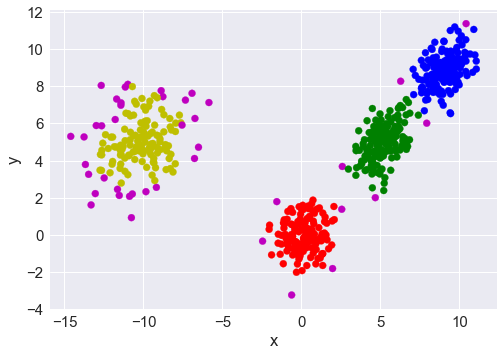

In [101]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.85, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# -1 are outliers

Counter({1: 299, 0: 150, 2: 143, -1: 8})


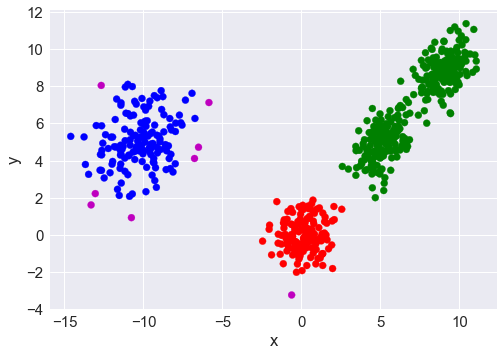

In [109]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=1, min_samples=3)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)

plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 300, 0: 200})


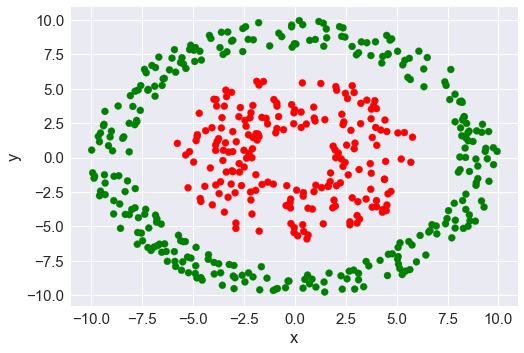

In [112]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=2, min_samples=10) #metric='euclidean' --this specifies how to calculate eps distance
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Much better than k-means on this dataset! Let's try to cook up something that DBSCAN doesn't work as well on.

### Create some synthetic data

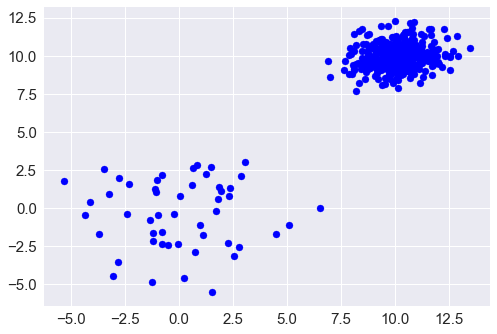

In [131]:
data = []
dist = multivariate_normal(mean=[0,0], cov=[[6,2],[2,6]])
for i in range(50):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[10,10], cov=[[1,0.1],[0.1,0.6]])
for i in range(400):
    data.append(dist.rvs())    
    
df2 = pd.DataFrame(data, columns=["x", "y"])
df2.head()
plt.scatter(df2['x'], df2['y'],c='b')
plt.show()

Counter({1: 400, 0: 40, -1: 10})


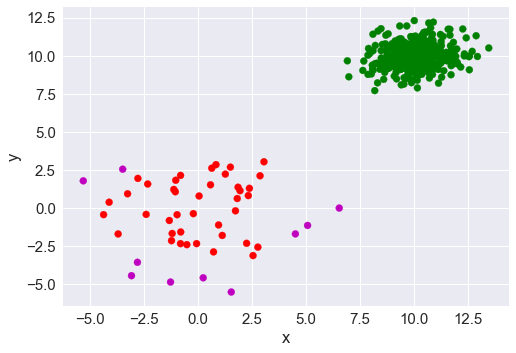

In [135]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=2, min_samples=10)
X = df2[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df2['x'], df2['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 400, 0: 50})


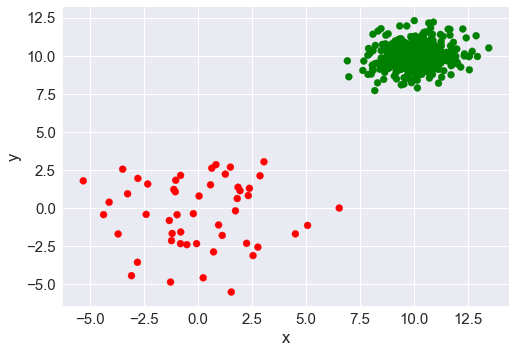

In [134]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=4, min_samples=10)
X = df2[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df2['x'], df2['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Exercise: DBSCAN

For the Iris dataset, fit and plot DBSCAN models to:
* sepal_length and petal_length
* sepal_width and petal_width

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

Counter({1: 90, 0: 50, -1: 10})
adjusted rand score: 0.544570168993


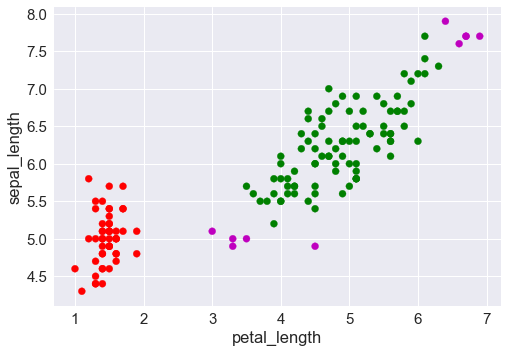

In [136]:

estimator = DBSCAN(eps=0.35, min_samples=5)
X = iris[["petal_length","sepal_length"]]
estimator.fit(X)

labels = estimator.labels_
print (Counter(labels))
print ('adjusted rand score:',metrics.adjusted_rand_score(np.array(iris.species), labels) )

colors = set_colors(labels)
plt.scatter(iris['petal_length'], iris['sepal_length'], c=colors)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

Counter({1: 100, 0: 49, -1: 1})
adjusted rand score: 0.558371443754


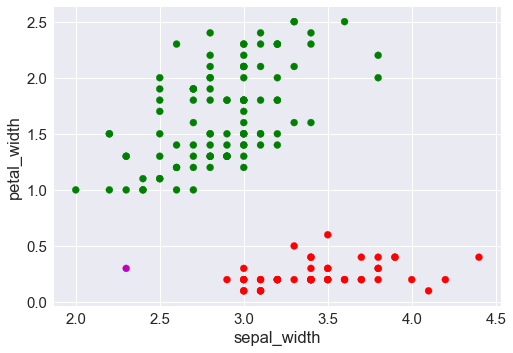

In [128]:
estimator = DBSCAN(eps=0.5, min_samples=5)
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)

labels = estimator.labels_
print (Counter(labels))
print ('adjusted rand score:',metrics.adjusted_rand_score(np.array(iris.species), labels) )

colors = set_colors(labels)
plt.scatter(iris['sepal_width'], iris['petal_width'], c=colors)
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.show()

## Hierarchical Clustering

Counter({2: 151, 1: 150, 0: 150, 3: 149})


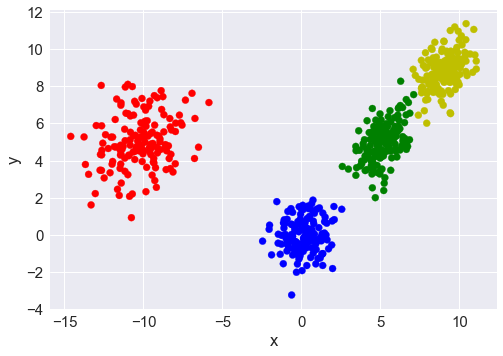

In [137]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({0: 295, 1: 205})


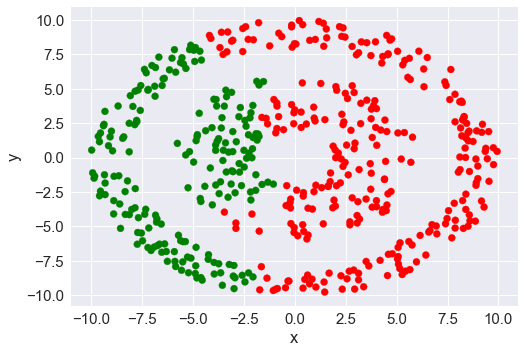

In [139]:
# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Exercise: Hierarchical Clustering

For the Iris dataset, fit and plot hierarachical clustering models to:
* sepal_length and petal_length
* sepal_width and petal_width

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

Counter({0: 72, 1: 50, 2: 28})
0.642251251836


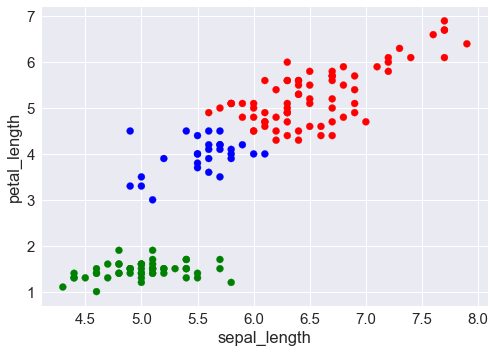

In [148]:
estimator = AgglomerativeClustering(n_clusters=3,linkage='ward')
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)

labels = estimator.labels_
print (Counter(labels))
print (metrics.adjusted_rand_score(np.array(iris.true_value), labels) )

colors = set_colors(labels)
plt.scatter(iris['sepal_length'], iris['petal_length'], c=colors)
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()

Counter({0: 74, 1: 50, 2: 26})
0.644447235392


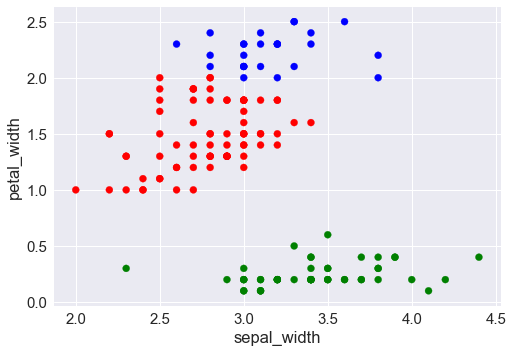

In [145]:
estimator = AgglomerativeClustering(n_clusters=3,linkage='ward')
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)

labels = estimator.labels_
print (Counter(labels))
print (metrics.adjusted_rand_score(np.array(iris.true_value), labels) )

colors = set_colors(labels)
plt.scatter(iris['sepal_width'], iris['petal_width'], c=colors)
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.show()

## Elbow Method

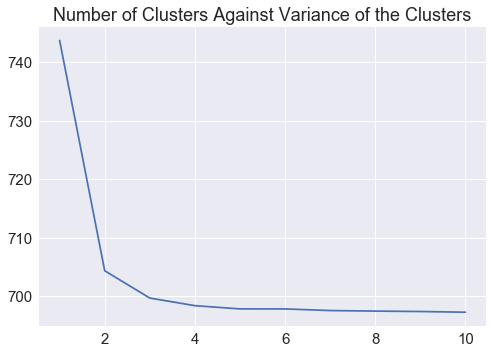

In [152]:
X = iris[['petal_length','sepal_length']]
wk_coeff = []
k_values = range(1, 11)


for n_cluster in k_values:
    estimator = KMeans(n_clusters=n_cluster)
    estimator.fit(X)
    # Clusters are given in the labels_ attribute
    labels = estimator.labels_
    val = 0
    for e, c in enumerate(estimator.cluster_centers_):
        val += ((iris[labels == e][iris.columns[2]] - c[0])**2 + 
        (iris[labels == e][iris.columns[3]] - c[1])**2).apply(np.sqrt).sum()
    wk_coeff.append(val)

plt.plot(k_values,wk_coeff)
plt.title('Number of Clusters Against Variance of the Clusters')

#you don't want too LITTLE variance because that means the clusters are small and exclude many points which may be
#close to them

In [150]:
estimator.cluster_centers_

array([[ 4.88571429,  6.01428571],
       [ 1.51923077,  5.01538462],
       [ 6.56666667,  7.71666667],
       [ 4.155     ,  5.645     ],
       [ 5.52916667,  6.54166667],
       [ 1.33846154,  4.56923077],
       [ 3.475     ,  5.25      ],
       [ 4.58666667,  6.55333333],
       [ 1.48181818,  5.5       ],
       [ 6.03333333,  7.23333333]])

## Silhouette Coefficient

In [153]:
from sklearn import metrics

estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

print (metrics.silhouette_score(X, labels, metric='euclidean'))

#silhouette value ranges from -1 to 1, where -1 is the worst, 1 is the best

Counter({2: 151, 3: 150, 1: 150, 0: 149})
0.721636727187


In [154]:
estimator = DBSCAN(eps=1.2, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))
print (metrics.silhouette_score(X, labels, metric='euclidean'))

Counter({1: 299, 0: 150, 2: 141, -1: 10})
0.616912971346


In [155]:
estimator = AgglomerativeClustering(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

print (metrics.silhouette_score(X, labels, metric='euclidean'))

Counter({2: 151, 1: 150, 0: 150, 3: 149})
0.719341096357


For the silhouette coefficient, larger is better, so k-means was a better clustering algorithm on this data set with the given parameter choice.

## Exercise: Silhouette coefficients

Test k-means, DBSCAN and hierarchical clustering varying the model parameters on the iris dataset. Judge the quality of the models by their Silhouette coefficients. 

**Bonus:** Repeat the same on the remaining datasets used in this lab.

In [27]:
X = iris[["sepal_width", "petal_width"]]

## Clustering for more than 2 variables

In [157]:
titanic = pd.read_csv('titanic.csv')
titanic.set_index('PassengerId', inplace=True)
titanic = titanic.join(pd.get_dummies(titanic.Pclass))
titanic['is_male'] = titanic.Sex.apply(lambda x: True if x == 'male' else False)


titanic['Age'] = titanic.groupby(["Sex", 'Pclass']).Age.transform(lambda x: x.fillna(x.mean()))
titanic['had_parents'] = titanic.Parch.apply(lambda x: 1 if x > 0 else 0)
titanic['had_siblings'] = titanic.SibSp.apply(lambda x: 1 if x > 0 else 0)
feature_set = titanic[['is_male', 1, 2, 'Fare', 'Age', 'had_parents', 'had_siblings']]
kmeans = KMeans(n_clusters=8).fit(feature_set)
#feature_set
labels = kmeans.labels_

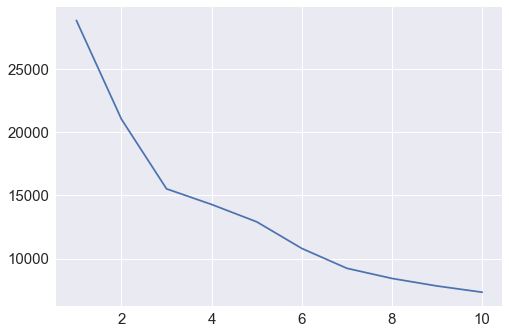

In [158]:
#X = df[["x", "y"]]
X = feature_set
wk_coeff = []
k_values = range(1, 11)


for n_cluster in k_values:
    estimator = KMeans(n_clusters=n_cluster)
    estimator.fit(X)
    # Clusters are given in the labels_ attribute
    labels = estimator.labels_
    val = 0
    for e, c in enumerate(estimator.cluster_centers_):
        val += ((titanic[labels == e]['is_male'] - c[0])**2 + 
        (titanic[labels == e][1] - c[1])**2+
               (titanic[labels == e][2] - c[2])**2 + 
               (titanic[labels == e]['Fare'] - c[3])**2 + 
               (titanic[labels == e]['Age'] - c[4])**2 + 
               (titanic[labels == e]['had_parents'] - c[5])**2 + 
               (titanic[labels == e]['had_siblings'] - c[6])**2).apply(np.sqrt).sum()
    wk_coeff.append(val)

plt.plot(k_values,wk_coeff)

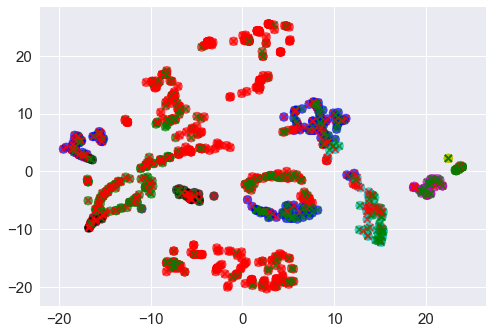

In [162]:
from sklearn.manifold import TSNE 

feature_set_embedded = TSNE(n_components=2).fit_transform(feature_set)
x_embedded,y_embedded = zip(*feature_set_embedded)

true_labels = []
for row in titanic.itertuples():
    true_labels.append(row.Survived)



colors = set_colors(labels)
colors_true = set_colors(true_labels)
plt.scatter(x_embedded, y_embedded, c=colors, s=80, alpha=0.7)
plt.scatter(x_embedded, y_embedded, c=colors_true, marker='x',alpha=0.7)

plt.show()